In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/

 AI_SaaS_MVP_Roadmap_Notion.md			   Files
 all_ans.gdoc					   FINAL450.xlsx
' ANN-Hyper Parameter Optimization.ipynb'	  'Final & second Project.gdoc'
 BackPack_Ans.gdoc				   mohsin.pdf
 certificate.pdf				  'phitron backup'
 Churn_Modelling.csv				   Photo
'Colab Notebooks'				  'professinal email.gdoc'
'Copy of c_programming.pdf'			  'project update.gdoc'
'Copy of Zapier: Gmail signature templates.gdoc'   xray_dataset.zip
 Cv_mohsin.pdf


In [4]:
!unzip drive/MyDrive/xray_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1192-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1258-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1228-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1202-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1176-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1261-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1188-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1198-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1254-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1242-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1189-0001.jpeg  
  inflating: chest_xray/train

In [5]:
Datadir = r'chest_xray/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']
img_size = 100

In [6]:
# Prepare all training data
training_data = []

for i in CATEGORIES:
    path = os.path.join(Datadir, i)
    class_num = CATEGORIES.index(i)

    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])

        except Exception as e:
            pass

In [7]:
len(training_data)

5226

In [8]:
# Apply Shuffle
import random
random.shuffle(training_data)

In [9]:
# splite x, y

x = []
y = []

for feature, label in training_data:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [10]:
y[:2]

array([1, 0])

In [11]:
# Reshape & Scale Image
x = x.reshape(-1, img_size, img_size, 1) / 255.0

In [12]:
# Prepare all validation data

Datadir_val = r"chest_xray/val"
validation_data = []

for i in CATEGORIES:
    path = os.path.join(Datadir_val, i)
    class_num = CATEGORIES.index(i)

    for img in os.listdir(path):
        try:
            img_array_val = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array_val = cv2.resize(img_array_val, (img_size, img_size))
            validation_data.append([new_array_val, class_num])
        except Exception as e:
            pass

In [13]:
len(validation_data)

16

In [14]:
# Apply Shuffle on validation data
random.shuffle(validation_data)

In [15]:
# splite x, y on validation data

x_val = []
y_val = []

for features, labels in validation_data:
    x_val.append(features)
    y_val.append(labels)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [16]:
y_val[:3]

array([1, 1, 0])

In [17]:
# Reshape & Scale Image

x_val = x_val.reshape(-1, img_size, img_size, 1) / 255.0

In [18]:
x.shape

(5226, 100, 100, 1)

In [19]:
x_val.shape

(16, 100, 100, 1)

### CNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pickle

In [21]:
# intializing the neural network layer for training the model

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile Model

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
# Fit model with 10 epoch

model.fit(x, y, batch_size=4, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8420 - loss: 0.3914 - val_accuracy: 0.6250 - val_loss: 1.1974
Epoch 2/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9546 - loss: 0.1369 - val_accuracy: 0.8750 - val_loss: 0.2962
Epoch 3/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9579 - loss: 0.1174 - val_accuracy: 1.0000 - val_loss: 0.0406
Epoch 4/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9660 - loss: 0.0873 - val_accuracy: 1.0000 - val_loss: 0.0789
Epoch 5/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9738 - loss: 0.0742 - val_accuracy: 0.9375 - val_loss: 0.1836
Epoch 6/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9772 - loss: 0.0713 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 7/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9794 - loss: 0.0598 - val_accuracy: 0.8750 - val_loss: 0.2399
Epoch 8/10
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9788 - loss: 0.053

In [25]:
model.save(r'model_xray.h5')

In [26]:
# Test Model
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

def img_prepare(image):
    img_t = tf.keras.preprocessing.image.load_img(image, color_mode='grayscale',
                                                target_size=(img_size, img_size))
    image_array = tf.keras.preprocessing.image.img_to_array(img_t)
    return image_array.reshape(-1, img_size, img_size, 1)

In [27]:
model = load_model('model_xray.h5')

In [28]:
image = r'chest_xray/test/NORMAL/IM-0059-0001.jpeg'
prediction = model.predict(img_prepare(image) / 255.0)
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
[[0.00076377]]
0
NORMAL


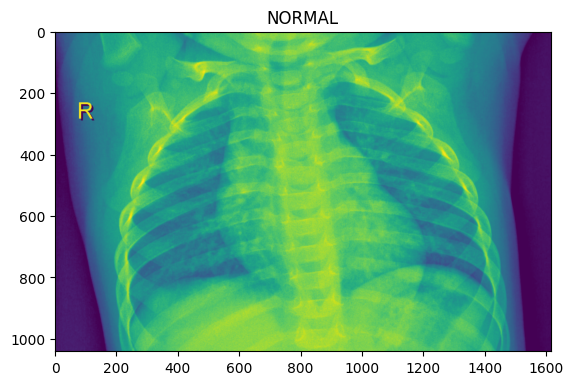

In [35]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.show()

In [37]:
image2 = r'chest_xray/test/PNEUMONIA/person1_virus_8.jpeg'
prediction2 = model.predict([img_prepare(image2)/255.0])
print(prediction2)
print(round(prediction2[0][0]))
print(CATEGORIES[int(round(prediction2[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.99999523]]
1
PNEUMONIA


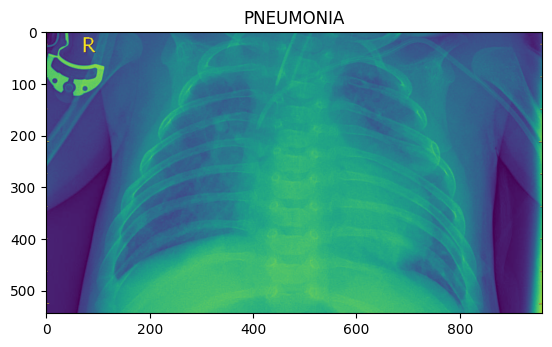

In [38]:
img2=mpimg.imread(image2)
imgplot=plt.imshow(img2)
plt.title(CATEGORIES[int(round(prediction2[0][0]))])
plt.show()